In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings

warnings.filterwarnings(action='ignore')

X.shape : (26, 2)


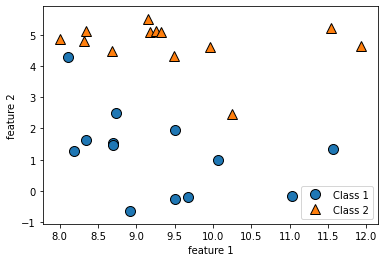

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 1", 'Class 2'], loc=4)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
print(f"X.shape : {X.shape}")

Text(0, 0.5, 'target')

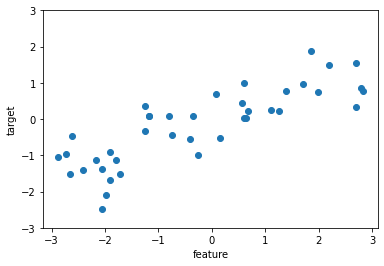

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys():\n {cancer.keys()}")

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(f"유방암 데이터의 형태 : {cancer.data.shape}")

유방암 데이터의 형태 : (569, 30)


In [6]:
print("클래스별 샘플 개수 : \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [7]:
print(f"특성 이름 : \n {cancer.feature_names}")

특성 이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"데이터의 형태 : {boston.data.shape}")

데이터의 형태 : (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print(f"X.shape : {X.shape}")

X.shape : (506, 104)


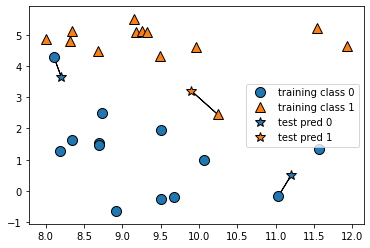

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

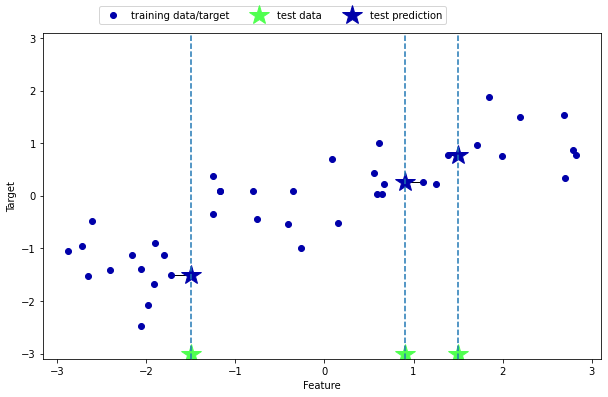

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

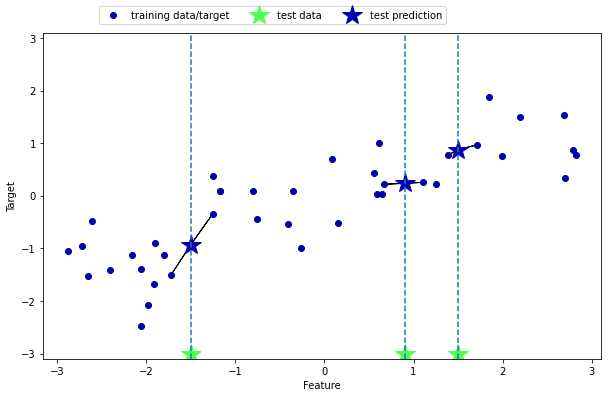

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
print(f"테스트 세트 예측 : \n {reg.predict(X_test)}")

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [15]:
print(f"테스트 세트 R^2 : {reg.score(X_test, y_test):.2f}")

테스트 세트 R^2 : 0.83


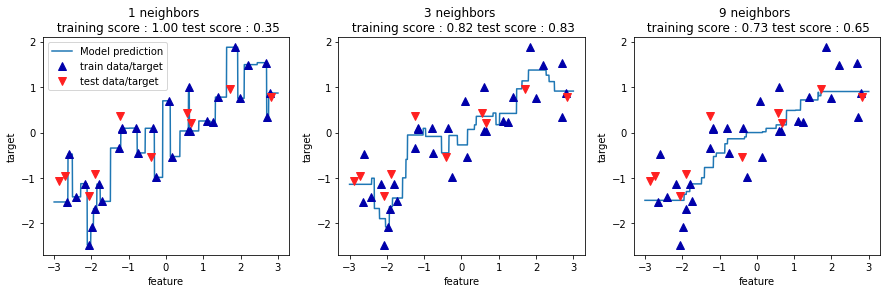

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbors} neighbors \n training score : {reg.score(X_train, y_train):.2f} test score : {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["Model prediction", "train data/target", "test data/target"], loc='best')

## 회귀용 선형 모델

### 선형 회귀(Linear Regression)

w[0]: 0.393906  b: -0.031804


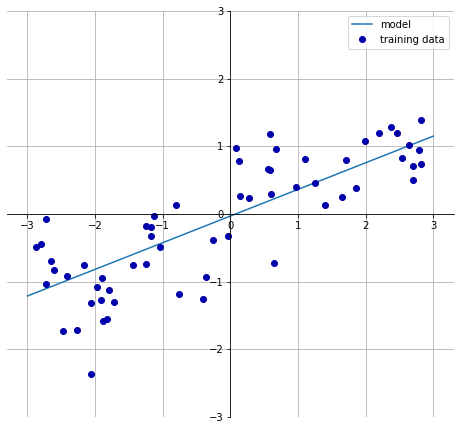

In [17]:
mglearn.plots.plot_linear_regression_wave()

In [18]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [19]:
print(f"lr.coef_ : {lr.coef_}")
print(f"lr.intercept_ : {lr.intercept_}")

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [20]:
print(f"훈련 세트 점수 : {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lr.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [21]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print(f"훈련 세트 점수 : {lr.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lr.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


### Ridge(릿지) : L2 Regularization

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f"훈련 세트 점수 : {ridge.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {ridge.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [24]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"훈련 세트 점수 : {ridge10.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {ridge10.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [25]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"훈련 세트 점수 : {ridge01.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {ridge01.score(X_test, y_test):.2f}")

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


Ridge 모델은 hyperparameter인 alpha를 통해 규제 강도를 조절할 수 있다. alpha 값이 클수록 규제가 강하며, 작을수록 규제가 약하다.
높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절댓값 크기가 작을 것이라고 예상할 수 있다.

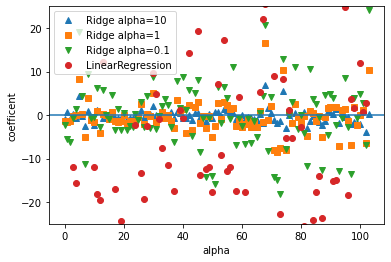

In [26]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel('alpha')
plt.ylabel('coefficent')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

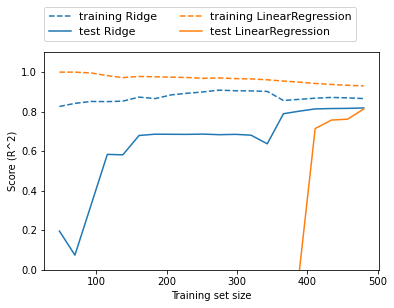

In [27]:
# LinearRegressor vs Ridge(alpha=1)
# learning curve : 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프
mglearn.plots.plot_ridge_n_samples()

### Lasso(라소) : L1 Regularizaion

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"훈련 세트 점수 : {lasso.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lasso.score(X_test, y_test):.2f}")
print(f"사용한 특성의 수 : {np.sum(lasso.coef_ != 0)}")

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 수 : 4


In [29]:
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train, y_train)
print(f"훈련 세트 점수 : {lasso001.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lasso001.score(X_test, y_test):.2f}")
print(f"사용한 특성의 수 : {np.sum(lasso001.coef_ != 0)}")

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 수 : 32


In [30]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print(f"훈련 세트 점수 : {lasso00001.score(X_train, y_train):.2f}")
print(f"테스트 세트 점수 : {lasso00001.score(X_test, y_test):.2f}")
print(f"사용한 특성의 수 : {np.sum(lasso00001.coef_ != 0)}")

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 수 : 96


Text(0, 0.5, 'coefficient')

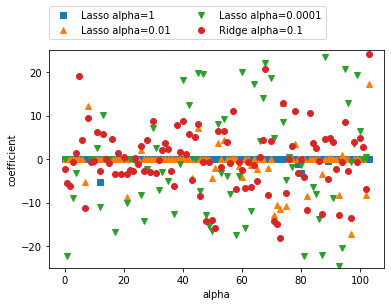

In [31]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('alpha')
plt.ylabel('coefficient')

## 분류용 선형 모델 

### 로지스틱 회귀(Logistic Regression) & 선형 서포트 벡터 머신(Linear Support Vector Machine)

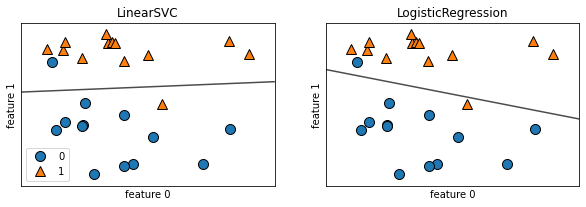

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

Logistic Regression과 LinearSVC에서 규제의 강도를 결정하는 hyperparameter는 C이다. Lidge나 Rasso에서 규제의 강도를 결정하는 hyperparameter인 alpha와는 달리 C는 값이 높아지면 규제가 감소한다. 다시 말해 매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면에 C 값을 낮추면 모델은 가중치(w)가 0에 가까워지도록 만든다.

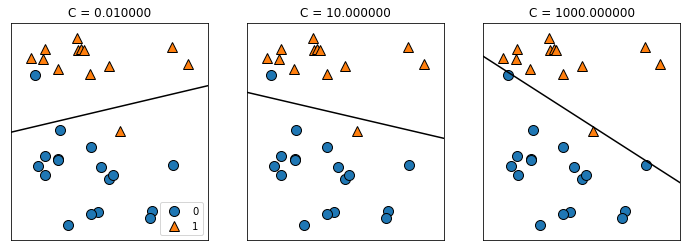

In [33]:
mglearn.plots.plot_linear_svc_regularization()

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print(f"훈련 세트 점수 : {logreg.score(X_train, y_train):.3f}")
print(f"테스트 세트 점수 : {logreg.score(X_test, y_test):.3f}")

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [35]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print(f"훈련 세트 점수 : {logreg100.score(X_train, y_train):.3f}")
print(f"테스트 세트 점수 : {logreg100.score(X_test, y_test):.3f}")

훈련 세트 점수 : 0.981
테스트 세트 점수 : 0.965


In [36]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print(f"훈련 세트 점수 : {logreg001.score(X_train, y_train):.3f}")
print(f"테스트 세트 점수 : {logreg001.score(X_test, y_test):.3f}")

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


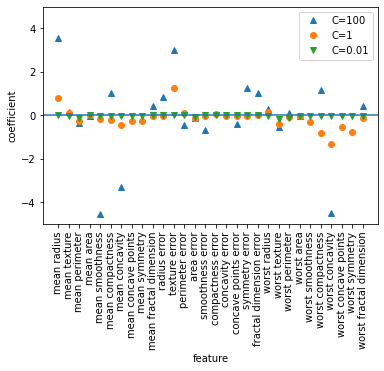

In [37]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1]) # horizon line
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


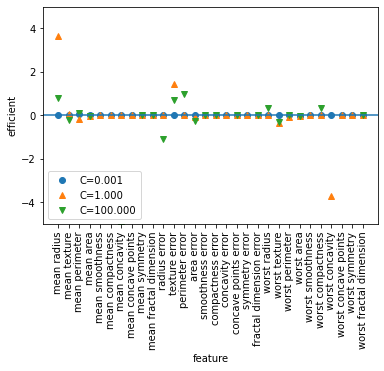

In [38]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C ,penalty='l1', max_iter=1000).fit(X_train, y_train)
    print(f"C={C} 인 l1 로지스틱 회귀의 훈련 정확도 : {lr_l1.score(X_train, y_train):.2f}")
    print(f"C={C} 인 l1 로지스틱 회귀의 테스트 정확도 : {lr_l1.score(X_test, y_test):.2f}")
    plt.plot(lr_l1.coef_.T, marker, label=f"C={C:.3f}")
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel("efficient")

plt.ylim(-5, 5)
plt.legend(loc='lower left')

### 다중 클래스 분류용 선형 모델

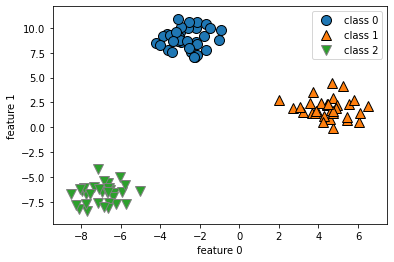

In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

In [40]:
linear_svm = LinearSVC().fit(X, y)
print(f"계수 배열의 크기 : {linear_svm.coef_.shape}")
print(f"절편 배열의 크기 : {linear_svm.intercept_.shape}")

계수 배열의 크기 : (3, 2)
절편 배열의 크기 : (3,)


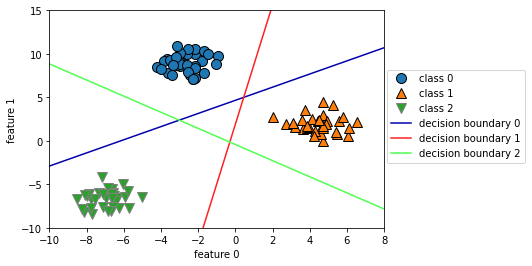

In [41]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'decision boundary 0', 'decision boundary 1', 'decision boundary 2'], loc = (1.01, 0.3))

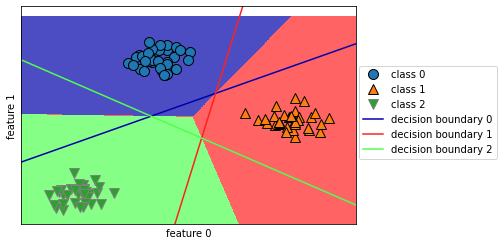

In [42]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'decision boundary 0', 'decision boundary 1', 'decision boundary 2'], loc = (1.01, 0.3))

## 결정 트리

**'결정 트리를 학습한다.' = '정답에 도달하는 예/아니오 질문 목록을 학습한다.'**

In [45]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"훈련 세트 정확도 : {tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도 : {tree.score(X_test, y_test):.3f}")

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.951


In [47]:
# pre-prunning 1 : max_depth
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"훈련 세트 정확도 : {tree.score(X_train, y_train):.3f}")
print(f"테스트 세트 정확도 : {tree.score(X_test, y_test):.3f}")

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.951


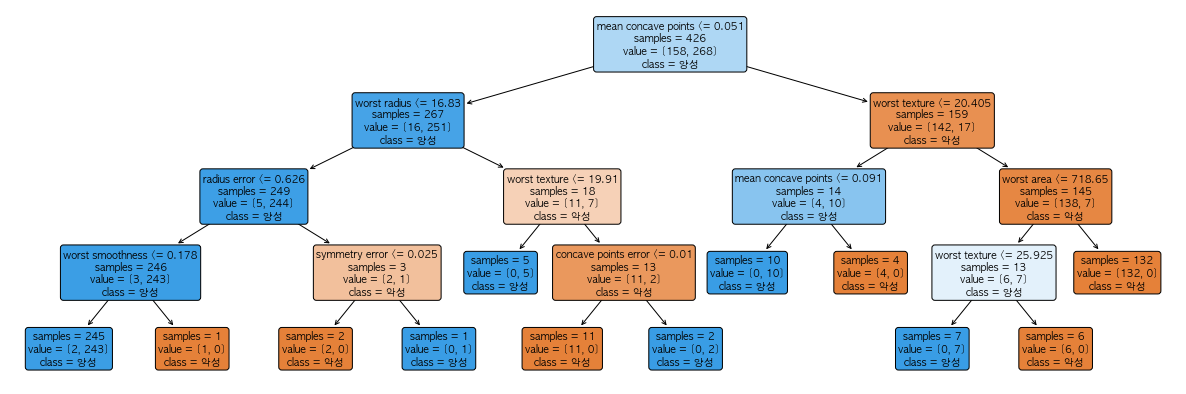

In [92]:
from sklearn.tree import plot_tree

plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(21, 7))
plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer.feature_names,
          impurity=False, rounded=True, filled=True, fontsize=10)
plt.show()

In [94]:
print(f"특성 중요도 : ", tree.feature_importances_)

특성 중요도 :  [0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


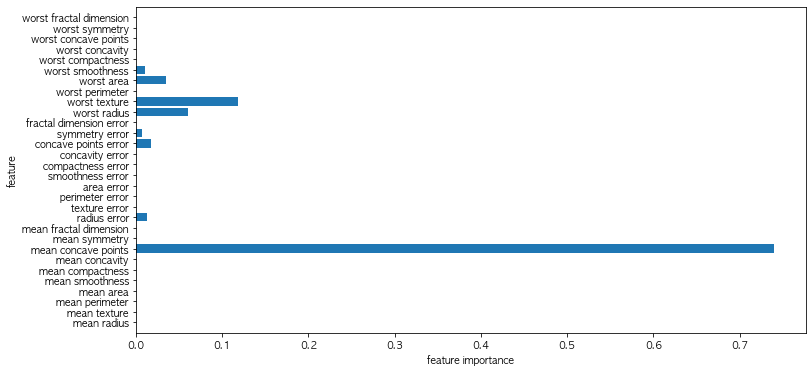

In [96]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plt.figure(figsize=(12, 6))
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


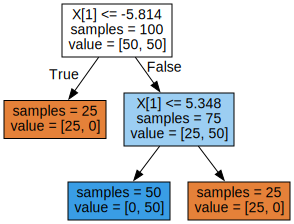

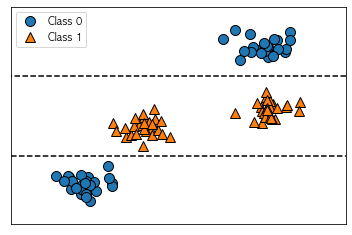

In [97]:
mglearn.plots.plot_tree_not_monotone()

**회귀를 위한 트리 기반의 모델(DecisionTreeRegressor)을 사용할 때 모델은 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없다.**

Text(0, 0.5, '가격 ($/Mbyte)')

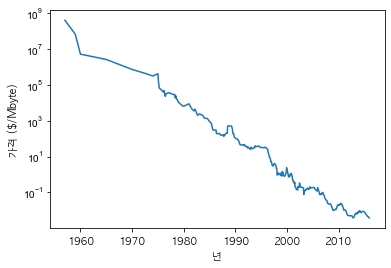

In [99]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')

In [108]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy().reshape(-1, 1)
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy().reshape(-1, 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


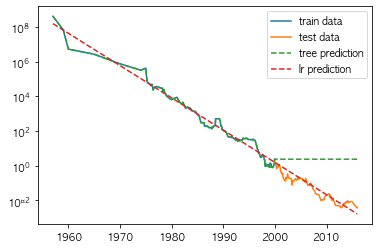

In [109]:
plt.semilogy(data_train.date, data_train.price, label='train data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, linestyle='dashed', label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, linestyle='dashed', label='lr prediction')
plt.legend()